<img src="jalalogo.png">




# Semana 2: Representaciones visuales


Además de calcular cantidades numéricas como la media, la mediana, la varianza, cuartiles, etc, puedes utilizar métodos visuales para presentar, describir y resumir datos. En esta sección, aprenderás a presentar tus datos visualmente utilizando los siguientes gráficos:

- Diagramas de caja (Box plots)
- Tablas de frecuencias
- Histogramas (Histograms)
- Gráficos círcular o de sectores (Pie charts)
- Gráficos de barras (Bar charts)
- Gráficos X-Y (X-Y plots)
- Gráfico de puntos (dot plot)

Utlizaremos la librería de Python  `matplotlib.pyplot` 


Considere la base de datos tomado de Kaggle:(Obesity Levels) sobre la cual se realizarán diferentes cálculos a traves del resto del Notebook.
 

https://www.kaggle.com/datasets/fatemehmehrparvar/obesity-levels



In [1]:
# Importamos las librerias necesarias
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import stemgraphic # Libreria para diagramas de tallos y hojas
np.random.seed(20)


#Cargamos la base de datos previamente descargada en la carpeta de trabajo.
df = pd.read_csv("data.csv")
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


## Diagramas de caja (Box plots)

El diagrama de caja es una herramienta visual muy útil para representar las estadísticas descriptivas de un conjunto de datos. Este gráfico puede mostrar:

- El rango (la diferencia entre el valor máximo y mínimo).
- El rango intercuartil (la diferencia entre el tercer y primer cuartil).
- La mediana (el valor central del conjunto de datos).
- Los valores atípicos (datos que se desvían significativamente del resto).
- Todos los cuartiles (los puntos que dividen el conjunto de datos en cuatro partes iguales).

Por otro lado, el rango intercuartil, conocido como IQR por sus siglas en inglés, ofrece una alternativa para medir la dispersión que es menos susceptible a los efectos de los valores atípicos. Esta medida también se emplea comúnmente para identificar dichos valores. En términos prácticos, un valor se considera atípico si se encuentra por debajo de `Q1 - 1.5 * IQR` o por encima de `Q3 + 1.5 * IQR`, donde Q1 y Q3 representan el primer y tercer cuartil, respectivamente. Este criterio se utiliza para determinar la longitud de los bigotes en un diagrama de caja.

 

<img src="BoxPlot-Interpretacion.png">

### Ejemplo:

Considere la base de datos anteriormente indicada y considere la columna `Weight`. Realice un diagrama de cajas para esta variable.

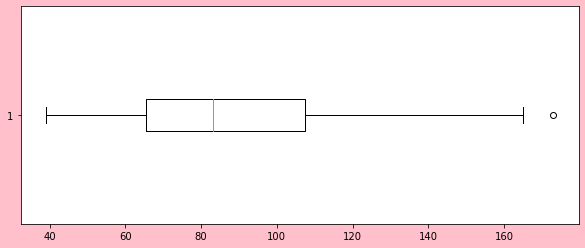

In [9]:
#cargamos los datos de la columna 'Weight'
data= df['Weight']
#Configuramos el tamaño de la figura
plt.figure(figsize =(10,4),facecolor = 'pink')
# Creamos el diagrama de caja
plt.boxplot(data,vert= False)

plt.show()

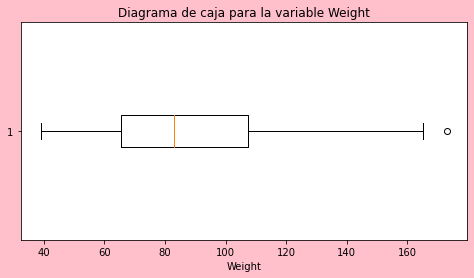

In [16]:
#Podemos añadirle alguna información al gráfico para una mejor lectura. 
#Agregamos al código nuevas instrucciones para crear las etiquetas.

#cargamos los datos de la columna 'Weight'
data= df['Weight']
#Configuramos el tamaño de la figura
plt.figure(figsize =(8,4),facecolor = 'pink')
# Creamos el diagrama de caja
plt.boxplot(data,vert = False)

# Añadir título y etiquetas para los ejes
plt.title('Diagrama de caja para la variable Weight')    # Añade un título al gráfico
plt.xlabel('Weight')                   


plt.show()

Ahora vamos a realizar dos diagramas de cajas, para la variable `Weight`, pero segmentando los datos por el género (`Gender`),   para observar diferencias en los pesos entre hombres y mujeres.

In [20]:
#Filtramos la base de datos para realizar el boxplot por generos

#base de datos filtrada por género femenino
df_female= df[df['Gender']=='Female']

#base de datos filtrada por género masculino
df_male= df[df['Gender']=='Male']

#seleccionamos solamente la columna Weigth de cada dataframe anterior.
data_female = df_female['Weight']
data_male = df_male['Weight']

data_male.describe()

count    1068.000000
mean       90.769478
std        21.407030
min        45.000000
25%        75.000000
50%        89.945470
75%       108.460518
max       173.000000
Name: Weight, dtype: float64

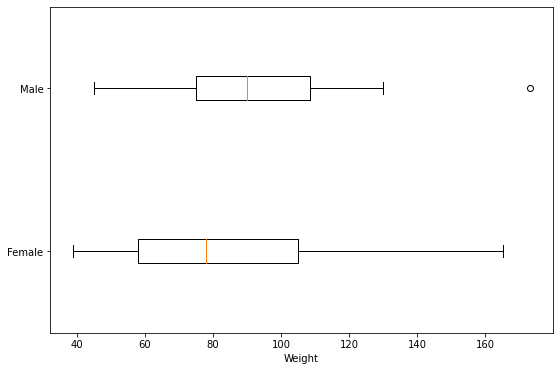

In [15]:
#cargamos los datos filtrados de la columna 'Weight'
data = [data_female, data_male] 

#Configuramos el tamaño de la figura
plt.figure(figsize =(9,6))

# Creamos el diagrama de caja
plt.boxplot(data,labels = ['Female', 'Male'],vert = False)
plt.xlabel('Weight')
plt.show()

En los diagramas de cajas (box plots) proporcionados, hay varias diferencias y características que pueden ser identificadas al comparar el peso de los géneros femenino y masculino:

1. **Mediana**: La línea naranja en cada caja indica la mediana del peso. La mediana en el grupo femenino parece estar alrededor de los 80, mientras que para el grupo masculino está un poco más alta, cerca de los 85. Esto sugiere que la mediana del peso es ligeramente superior en el género masculino.

2. **Rango Intercuartil (IQR)**: La altura de la caja representa el rango intercuartílico, que es la diferencia entre el tercer cuartil (Q3) y el primer cuartil (Q1). La caja del genero femenino es más larga que la del género masculino, lo que indica una variabilidad mayor  en los pesos dentro del grupo de las mujeres comparada con los hombres.

3. **Rango Total**: Los "bigotes" (las líneas que se extienden desde la parte superior e inferior de cada caja) representan el rango total del peso, excluyendo los valores atípicos. Los bigotes en el grupo femenino se extienden más que en el masculino, lo que indica que hay una mayor dispersión de los datos de peso en las mujeres.

4. **Valores Atípicos**: El círculo por encima del bigote superior en el diagrama de cajas del género femenino representa un valor atípico, indicando que hay al menos una mujer con un peso significativamente más alto que el resto. No hay valores atípicos visibles en el diagrama de cajas masculino.

5. **Simetría**: La caja del grupo masculino parece ser más simétrica respecto a la mediana, mientras que la caja del grupo femenino muestra un leve sesgo hacia los valores más bajos (la mediana está más cerca del primer cuartil que del tercero).

En resumen, mientras que el grupo masculino muestra una mediana más alta, el grupo femenino muestra una mayor dispersión en los pesos y la presencia de valores atípicos en el extremo superior del rango de peso.

## Ejercicio:
Considere la base de datos anteriormente indicada y considere la columna `Height`. Realice un diagrama de cajas para esta variable  pero segmentando los datos por el género (`Gender`),   para observar diferencias en las estaturas entre hombres y mujeres.

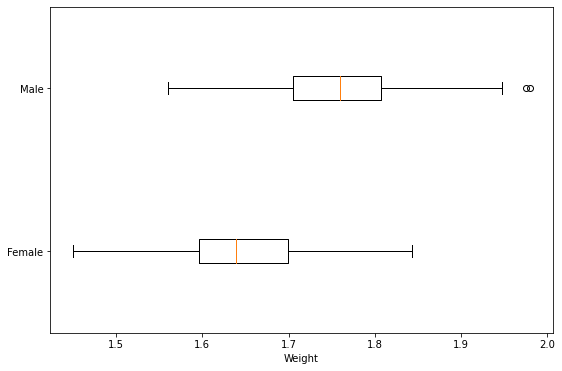

In [18]:
#Filtramos la base de datos para realizar el boxplot por generos

#base de datos filtrada por género femenino
df_female= df[df['Gender']=='Female']

#base de datos filtrada por género masculino
df_male= df[df['Gender']=='Male']

#seleccionamos solamente la columna Weigth de cada dataframe anterior.
height_female = df_female['Height']
height_male = df_male['Height']



#cargamos los datos filtrados de la columna 'Weight'
data = [height_female, height_male] 

#Configuramos el tamaño de la figura
plt.figure(figsize =(9,6))

# Creamos el diagrama de caja
plt.boxplot(data,labels = ['Female', 'Male'],vert = False)
plt.xlabel('Weight')
plt.show()

## Tablas de frecuencia Simple

Una tabla de frecuencia simple  organiza y resume datos, mostrando la cantidad de veces (frecuencia) que cada valor o categoría ocurre en un conjunto de datos. 

## Ejemplo: 

Elaborar una tabla defrecuencia simple para la variable `Gender` y `CALC`
 

In [24]:
tabla_Gender = df['Gender'].value_counts()
print(tabla)

Male      1068
Female    1043
Name: Gender, dtype: int64


In [25]:
tabla_CALC = df['CALC'].value_counts()
print(tabla_CALC)

Sometimes     1401
no             639
Frequently      70
Always           1
Name: CALC, dtype: int64


## Tablas de frecuencia para datos agrupados
 
Las tablas de frecuencias para datos agrupados son una técnica eficaz al trabajar con grandes conjuntos de datos. Este método implica la división de los datos en intervalos de tamaño uniforme, denominados clases. Cada clase se caracteriza por valores que indican con qué frecuencia los datos caen dentro de ese intervalo.

En una tabla de frecuencia, la marca de clase es el punto medio de cada intervalo o clase. Se calcula sumando el límite inferior y el límite superior de cada clase y dividiendo el resultado por 2.
 

### Ejemplo: 


Considere la base de datos anteriormente indicada y considere la columna `Weight`.  

Calcula una tabla de frecuencias para la variable 'Weight' 
tomando como límite inferior del primer intervalo el primer cuartil Q1 y como limite superior del último intervalo el tercer cuartil  Q3 el conjunto de datos proporcionado. Considere un número de clases apropiado escogiendo un valor entre 5 y 20.

Discute los resultados y preséntalos en un gráfico.

#### Solución:

In [36]:
#Cargamos la base de datos previamente descargada en la carpeta de trabajo.
df = pd.read_csv("data.csv")

#calculemos el primer cuartil y tercer cuartil}
q1 = np.quantile(df['Weight'], 0.25)
q3 = np.quantile(df['Weight'], 0.75)
print(q1, q3)

65.473343 107.430682


In [37]:
#datos filtrados
filtered_data = df[(df['Weight'] >= q1) & (df['Weight'] <= q3)]

#definimos el número de clases:
num_clases = 15

#hallamos el valor mínimo: 
val_min = q1

#hallamos el valor máximo: 
val_max = q3

#hallamos el ancho o amplitud de la clase
A= (q3-q1)/num_clases
print(A)

2.797155933333334


In [38]:
# Definir los límites de clase
limites = [q1 + A * i for i in range(num_clases+1)]

# Crear el DataFrame con las frecuencias
df = pd.cut(filtered_data['Weight'], bins=limites, include_lowest=True, right=False)
df = pd.value_counts(df, sort=False).reset_index()
df.columns = ['Intervalo', 'Frecuencia']

#Calculamos la marca de clase:
df['Marca de clase'] = df['Intervalo'].apply(lambda x: (x.left + x.right) / 2)

# Calcular la frecuencia acumulada
df['Frecuencia acumulada'] = df['Frecuencia'].cumsum()



# Calcular la frecuencia relativa
df['Frecuencia relativa'] = df['Frecuencia'] / len(data)

# Calcular la frecuencia relativa acumulada
df['Frecuencia relativa acumulada'] = df['Frecuencia relativa'].cumsum()

# Mostrar la tabla de frecuencias
print(df)

             Intervalo  Frecuencia Marca de clase  Frecuencia acumulada  \
0      [65.473, 68.27)          60          66.87                    60   
1      [68.27, 71.068)          75          69.67                   135   
2     [71.068, 73.865)          34          72.47                   169   
3     [73.865, 76.662)          85          75.26                   254   
4     [76.662, 79.459)          87          78.06                   341   
5     [79.459, 82.256)         155          80.86                   496   
6     [82.256, 85.053)         106          83.65                   602   
7     [85.053, 87.851)          65          86.45                   667   
8     [87.851, 90.648)          78          89.25                   745   
9     [90.648, 93.445)          28          92.05                   773   
10    [93.445, 96.242)          33          94.84                   806   
11    [96.242, 99.039)          43          97.64                   849   
12   [99.039, 101.836)   

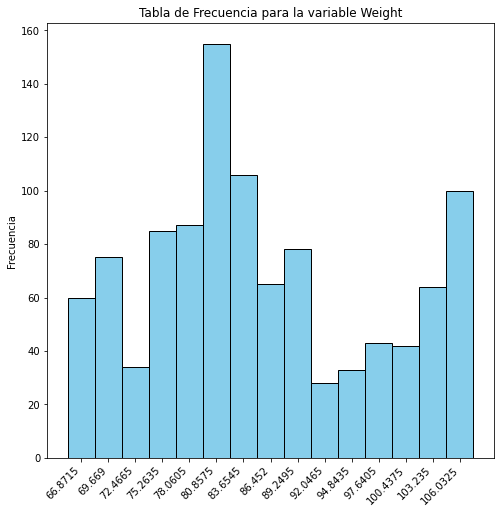

In [40]:
bins = df['Marca de clase'].tolist()
# Frecuencias para cada bin
frequencies = df['Frecuencia'].tolist()

plt.figure(figsize=(8, 8))  # tamaño del gráfico
plt.bar(bins, frequencies,width=A, edgecolor='black', align='center', color='skyblue')
plt.xticks(ticks=bins, labels=bins, rotation=45, ha='right')  # Ajustar los ticks y etiquetas
plt.title('Tabla de Frecuencia para la variable Weight')
plt.ylabel('Frecuencia')
plt.show()

### Ejemplo:

Un estudio sobre el comportamiento de consumo de una familia en un centro comercial se llevó a cabo durante varias semanas. Se registraron los montos de gastos en diferentes categorías de productos, como ropa, alimentos y artículos para el hogar. Los datos recopilados incluyen las siguientes cantidades en dólares:

77, 18, 63, 84, 38, 54, 50, 59, 54, 56, 36, 26, 50, 34, 44, 
        41, 58, 58, 53, 51, 62, 43, 52, 53, 63, 62, 62, 65, 61, 52, 60, 60, 45, 66, 83, 71, 63, 58, 61

Para analizar el patrón de gastos, se organizaran los datos en una distribución de frecuencias con siete clases y un límite inferior de la primera clase de 16. Este análisis permitirá identificar los rangos de gastos más comunes  y una visión detallada de cómo la familia distribuye su presupuesto durante sus visitas al centro comercial. La información obtenida será valiosa para comprender mejor las preferencias de compra y tomar mejores desiciones en estrategias de gestión financiera familiar.


In [27]:
# Solución
pd.set_option('display.precision', 2) # Configuramos Pandas para mostrar solo dos decimales en los valores numéricos
 

# Datos de ejemplo
x = [77, 18, 63, 84, 34, 59, 59, 54, 56, 36, 26, 34, 44,
        41, 58, 58, 53, 51, 62, 43, 52, 53, 63, 62, 65, 51, 62, 60, 68, 45, 65, 83, 71, 63, 58, 61]

# definimos el número de clases:
num_clases = 7

# hallamos el valor mínimo:
val_min = min(x)

# hallamos el valor máximo:
val_max = max(x)

# hallamos el ancho (amplitud) de la clase
A = (val_max - val_min) / num_clases

# Dado que A=9.42, podemos tomar el ancho de clases igual a 10 y considerar el primer intervalo de
#clase partiendo de 16 con el fin de que el último intervalo tenga como límite superior a 86.

# Definir los límites de clase
limites = [16 + 10 * i for i in range(num_clases+1)]

# Crear el DataFrame con las frecuencias
df = pd.cut(x, bins=limites, include_lowest = True, right=False) # pd.cut() es una función que permite dividir los datos
                                                                    # en los diferentes límites

df = pd.value_counts(df, sort=False).reset_index()  #El parámetro sort se debe seleccionar como falso para que no ordene 
                                                   # los intervalos en orden descendente según las frecuencias, sino que 
                                                    # conserve el orden en que fueron definidos

'''Después de usar value_counts, el resultado puede tener un índice que consiste en valores distintos
del índice entero estándar o puede estar basado en una de las columnas del DataFrame. 
Usar .reset_index() devuelve el índice a la forma estándar, y permite realizar operaciones sin 
ningún inconveniente'''

df
 

,index,0
0,"[16, 26)",1
1,"[26, 36)",3
2,"[36, 46)",5
3,"[46, 56)",6
4,"[56, 66)",16
5,"[66, 76)",2
6,"[76, 86)",3


In [28]:
# Renombramos las columnas

df.columns = ['Intervalo', 'Frecuencia']
# creemos el cálculo de las diferentes frecuencias
# Calcular la frecuencia acumulada
df['Frecuencia acumulada'] = df['Frecuencia'].cumsum()

# Calcular la frecuencia relativa
df['Frecuencia relativa'] = df['Frecuencia'] / len(x)

# Calcular la frecuencia relativa acumulada
df['Frecuencia relativa acumulada'] = df['Frecuencia relativa'].cumsum()

# Mostrar la tabla de frecuencias
print(df)

  Intervalo  Frecuencia  Frecuencia acumulada  Frecuencia relativa  \
0  [16, 26)           1                     1                 0.03   
1  [26, 36)           3                     4                 0.08   
2  [36, 46)           5                     9                 0.14   
3  [46, 56)           6                    15                 0.17   
4  [56, 66)          16                    31                 0.44   
5  [66, 76)           2                    33                 0.06   
6  [76, 86)           3                    36                 0.08   

   Frecuencia relativa acumulada  
0                           0.03  
1                           0.11  
2                           0.25  
3                           0.42  
4                           0.86  
5                           0.92  
6                           1.00  


## Histograma

Los histogramas son una herramienta para visualizar una gran cantidad de valores únicos en un conjunto de datos de una variable cuantitativa. En esencia, un histograma divide estos valores en intervalos, comúnmente llamados bins o clases, para organizar la información de manera más comprensible. A menudo, estos intervalos tienen el mismo tamaño, pero esta no es una regla estricta.

Cada intervalo está definido por sus límites inferior y superior, conocidos como bordes. La frecuencia es el número de elementos que caen dentro de cada intervalo, proporcionando una medida de cuán comunes son los valores dentro de ese rango. Siguiendo una convención estándar, los intervalos incluyen los valores iguales al límite inferior pero excluyen los valores iguales al límite superior.

La información de frecuencia se representa visualmente mediante las alturas de las barras en el histograma, las cuales se colocan de manera adyacente para facilitar la comparación entre intervalos.

Este tipo de gráfico ofrece una representación clara y visual de cómo se distribuyen los datos a lo largo de los intervalos o clases, lo que permite identificar patrones y tendencias en la variación de los valores presentes en el conjunto de datos.



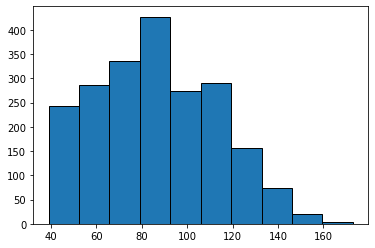

In [25]:
# Ejemplo: Realizar un histograma para la variable Weight

plt.hist(df['Weight'],bins= 10, edgecolor='black')
plt.show()

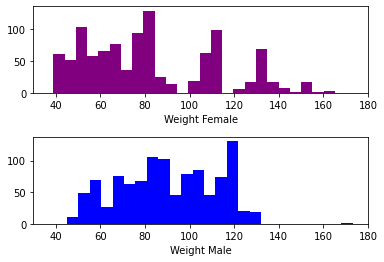

In [19]:


# Realicemos un histograma para la variable peso por cada género.

#Filtramos la base de datos para realizar el histograma por generos

#base de datos filtrada por género femenino
df_female= df[df['Gender']=='Female']

#base de datos filtrada por género masculino
df_male= df[df['Gender']=='Male']

#seleccionamos solamente la columna Weigth de cada dataframe anterior.
data_female = df_female['Weight']
data_male = df_male['Weight']


x0 = data_female
x1 = data_male
fig, ax = plt.subplots(2,1)
ax[0].hist(x0, bins =25,color ='purple' )
ax[1].hist(x1,bins=25,color='blue')

ax[0].set_xlabel('Weight Female')
ax[1].set_xlabel('Weight Male')
 
plt.subplots_adjust(hspace=0.5)  # Añadimos un espacio entre las dos gráficas

# Establecemos los mismos límites en el eje x para ambos subplots

ax[0].set_xlim(30, 180)
ax[1].set_xlim(30, 180)


plt.show()

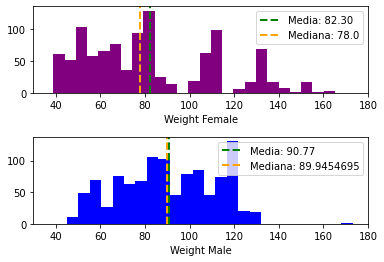

In [21]:
# Agregamos algunas instrucciones al código anterior para poder visualizar la media y la mediana.


x0 = data_female
x1 = data_male
fig, ax = plt.subplots(2,1)
ax[0].hist(x0, bins =25,color ='purple' )
ax[1].hist(x1,bins=25,color='blue')

ax[0].set_xlabel('Weight Female')
ax[1].set_xlabel('Weight Male')
 
plt.subplots_adjust(hspace=0.5)  # Añadimos un espacio entre las dos gráficas

# Establecemos los mismos límites en el eje x para ambos subplots

ax[0].set_xlim(30, 180)
ax[1].set_xlim(30, 180)


# Calculamos la media y la mediana
mean_female = np.mean(data_female)
median_female = np.median(data_female)
mean_male = np.mean(data_male)
median_male = np.median(data_male)

# Trazamo líneas verticales para la media y la mediana en el primer subplot
ax[0].axvline(mean_female, color='green', linestyle='dashed', linewidth=2, label=f'Media: {mean_female:.2f}')
ax[0].axvline(median_female, color='orange', linestyle='dashed', linewidth=2, label=f'Mediana: {median_female}')
ax[0].legend()

# Trazamosb líneas verticales para la media y la mediana en el segundo subplot
ax[1].axvline(mean_male, color='green', linestyle='dashed', linewidth=2, label=f'Media: {mean_male:.2f}')
ax[1].axvline(median_male, color='orange', linestyle='dashed', linewidth=2, label=f'Mediana: {median_male}')
ax[1].legend()

plt.show()

### Interpretación de los histogramas.



- **Media y Mediana:** En ambos histogramas, la línea de trazos verdes representa la media (promedio) del peso, y la línea de trazos naranjas indica la mediana (el valor central en un conjunto de datos ordenados).
  - Para el "Peso Femenino", la media es 82.30 y la mediana es 78.0.
  - Para el "Peso Masculino", la media es 90.77 y la mediana es aproximadamente 89.95.

- **Sesgo:** 
  - El histograma del "Peso Femenino" muestra un sesgo a la derecha (sesgo positivo), ya que la cola del gráfico se extiende más hacia los valores mayores y la media es más alta que la mediana.
  - El histograma del "Peso Masculino" también parece tener un ligero sesgo a la derecha, pero es menos pronunciado en comparación con el femenino, ya que la media y la mediana están más cercanas una de la otra.

- **Simetría:** 
  - Ninguno de los histogramas es perfectamente simétrico. 

- **Dispersión:**
 
  - Basado en la apariencia de los histogramas, parece que el "Peso Femenino" tiene una dispersión ligeramente mayor que el "Peso Masculino" porque sus barras están más esparcidas y hay un rango más amplio de pesos representados.
  - La presencia de pesos más extremos (muy bajos o muy altos) en el histograma femenino también sugiere una mayor dispersión en ese grupo comparado con el masculino.



**Lectura de la gráfica:**: Hay una tendencia de que a medida que la altura aumenta, el peso también tiende a aumentar. Esto es común, ya que generalmente las personas más altas tienen un mayor peso corporal.





## Diagrama Circular o de Pastel


Los gráficos de pastel representan datos que tienen un pequeño número de etiquetas a partir de sus frecuencias. Un gráfico de pastel es un círculo dividido en múltiples porciones. Cada porción corresponde a una etiqueta distinta del conjunto de datos y tiene un área proporcional a la frecuencia relativa asociada con esa etiqueta.

## Diagrama de barras

La gráfica de barras es la herramienta más utilizado para representar gráficamente variables cualitativas, donde el eje horizontal indica la variable y el eje vertical muestra la frecuencia de cada categoría. Una característica clave es que las barras están separadas por espacios, reflejando su naturaleza cualitativa. En esencia, se utiliza una serie de rectángulos de igual ancho para representar visualmente la frecuencia de cada categoría en la tabla de frecuencias.

La principal diferencia entre un diagrama de barras y un histograma radica en el tipo de datos que representan: categóricos vs. continuos, y en cómo se presentan las barras en relación con los ejes y entre sí.

### Ejemplo: 
Una empresa especializada en accesorios de moda vende bufandas en una variedad de colores: blanco, negro, morado, naranja, azul y rojo. Las ventas durante la semana se representan en la siguiente tabla:



| Color  | Cantidad |
|--------|----------|
| Blanco | 12       |
| Verde  | 8        |
| Morado | 22       |
| Azul   | 16       |


Realizar un diagrama de barras y un diagrama circular que represente la anterior tabla.

In [ ]:
#Datos del gráfico para el diagrama de barras
frecuencias = [22,16,12,8]
categorias = ['Morado', 'Azul','Blanco','Verde']
colores = ['purple','blue', 'white', 'green']
#crear el gráfico
plt.bar(categorias,frecuencias,color = colores,width = 0.4,edgecolor= 'black')
plt.title('DIAGRAMA DE BARRAS')
plt.xlabel('Color')
plt.ylabel('Frecuencia')
plt.show()

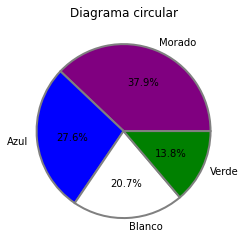

In [26]:
#Datos del gráfico para el diagrama circular
frecuencias = [22,16,12,8]
categorias = ['Morado', 'Azul','Blanco','Verde']
colores = ['purple','blue', 'white', 'green']
#crear el gráfico
plt.pie(frecuencias,labels =categorias,colors = colores, autopct = '%1.1f%%',wedgeprops = {"edgecolor" : "gray", 
                      'linewidth': 2}) 
plt.title('Diagrama circular')


plt.show()

In [27]:
# Retomemos el ejemplo general. Analicemos la varible Gender y representemos esta variable por medio de un gráfico circular

freq = df['Gender'].value_counts()
freq

Male      1068
Female    1043
Name: Gender, dtype: int64

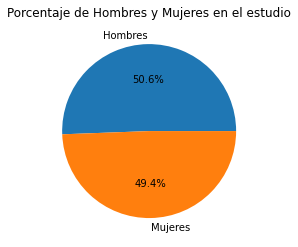

In [28]:
fig, ax = plt.subplots()
ax.pie(freq, labels=('Hombres', 'Mujeres'), autopct='%1.1f%%')
ax.set_title('Porcentaje de Hombres y Mujeres en el estudio')
plt.show()

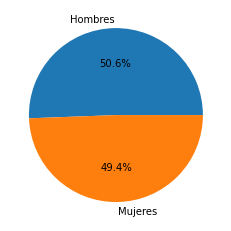

In [30]:
plt.pie(freq, labels=('Hombres', 'Mujeres'), autopct='%1.1f%%')

plt.show()

In [ ]:
#Quiza es mas conveniente realizar un diagrama circular en el caso de que
#la frecuencia conste de al menos dos clases y menos de 5.
#Tomemos la variable CALC, que corresponde a la pregunta: " How often do you drink alcohol? " y realicemos un diagrama circular.

freq_alcohol = df['CAEC'].value_counts()


fig, ax = plt.subplots()
ax.pie(freq_alcohol, labels= ('sometimes', 'frequently','always','no'), autopct='%1.1f%%')
ax.set_title('How often do you drink alcohol?')
plt.show()

In [ ]:
# Del grafico circular observamos que el 83.6% consumen alcohol algunas veces.

In [ ]:
#Tomemos la variable CALC, que corresponde a la pregunta: " How often do you drink alcohol? " 
#y realicemos un diagrama de barras.

freq_alcohol = df['CAEC'].value_counts()


# Luego, creamos el diagrama de barras utilizando estas frecuencias
freq_alcohol.plot(kind='bar')

# Podemos añadir etiquetas y título para mayor claridad
plt.xlabel('How often do you drink alcohol? ')
plt.ylabel('Frecuencia')
plt.title('Diagrama de Barras')
plt.xticks(rotation=30, horizontalalignment="center")

# Finalmente, mostramos la gráfica
plt.show()


## Diagrama de dispersión X-Y:

El diagrama de dispersión o gráfico X-Y representa los pares de datos de dos conjuntos de datos. El eje horizontal x muestra los valores del conjunto x, mientras que el eje vertical y muestra los valores correspondientes del conjunto. Opcionalmente, puedes incluir la línea de regresión y el coeficiente de correlación. 

### Ejemplo:

Considere la base datos  de Kaggle:(Obesity Levels)  

https://www.kaggle.com/datasets/fatemehmehrparvar/obesity-levels 

y analicemos si existe alguna relación entre la altura y el peso.


In [45]:
#Cargamos la base de datos con el fin de asegurarnos que esta sea cargada correctamente
df = pd.read_csv("data.csv")

# Identificamos los valores para x,y.
x = df['Height']
y= df['Weight']

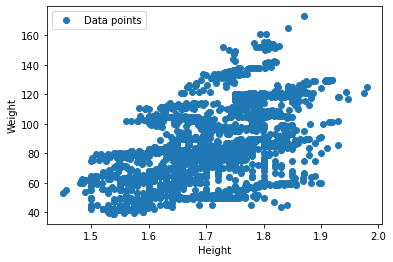

In [46]:
fig, ax = plt.subplots()
ax.plot(x, y, linewidth=0, marker='o', label='Data points')
#ax.plot(x, intercept + slope * x, label=line)
ax.set_xlabel('Height')
ax.set_ylabel('Weight')
ax.legend(facecolor='white')
plt.show()

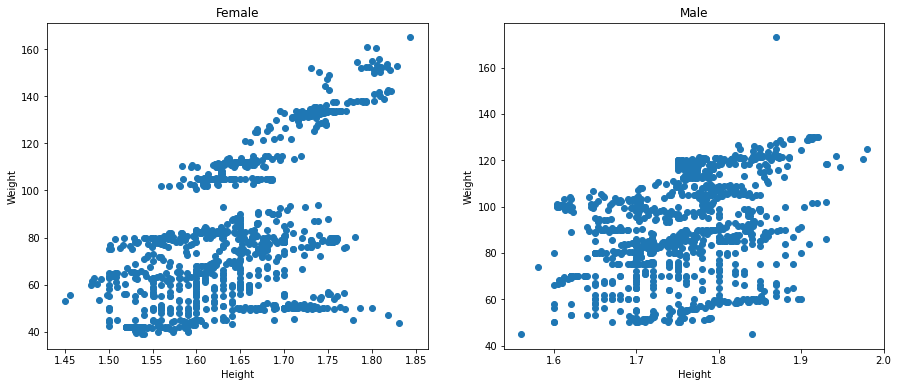

In [59]:
# ¿Qué pasa si filtramos los datos y solo hacemos el estudio para mujeres y luego para hombre?
df_filtreded_f = df[df['Gender']=='Female']
df_filtreded_m = df[df['Gender']=='Male']

# Identificamos los valores x y para gráficar el diagrama de dispersión:

x1=df_filtreded_f['Height']
y1=df_filtreded_f['Weight']


x2=df_filtreded_m['Height']
y2=df_filtreded_m['Weight']

fig, axs = plt.subplots(1,2,figsize=(15, 6))
axs[0].plot(x1,y1,linewidth =0,marker ='o')
axs[1].plot(x2,y2,linewidth =0,marker ='o')
axs[0].set_title('Female')
axs[1].set_title('Male')

axs[0].set_xlabel('Height')
axs[0].set_ylabel('Weight')
axs[1].set_xlabel('Height')
axs[1].set_ylabel('Weight')

plt.show()

Realicemos un diagrama de dispersión XY entre la variable `Age` y `Weight`

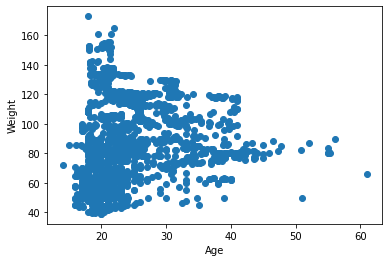

In [60]:
#Relacion entre edad y peso
x=df['Age']
y=df['Weight']

fig, ax = plt.subplots()
ax.plot(x,y,linewidth =0,marker ='o')
ax.set_xlabel('Age')
ax.set_ylabel('Weight')
plt.show()

### Ejemplo 

El pasado mes de agosto, una firma especializada en servicios de entrenamiento personal seleccionó a 50 instructores de fitness de la ciudad con el objetivo de ampliar su base de clientes. La cantidad de sesiones de entrenamiento que cada uno de estos 50 instructores llevó a cabo fue la siguiente:

83 51 66 61 82 65 54 56 92 60 
65 87 68 64 51 70 75 66 74 68 
44 55 78 69 98 67 82 77 79 62 
38 88 76 99 84 47 60 42 66 74 
91 71 83 80 68 65 51 56 73 55

Generar un histograma para analizar la distribución de las sesiones de entrenamiento realizadas por estos instructores. ¿Qué conclusiones obtiene de la información que se presenta en el gráfico?
 
#### Solución: 

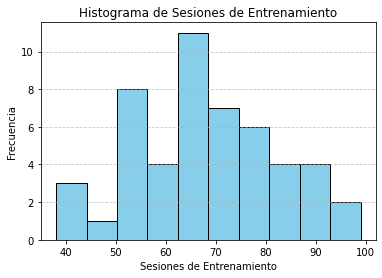

In [5]:
import matplotlib.pyplot as plt

# Datos de sesiones de entrenamiento
sesiones_entrenamiento = [83, 51, 66, 61, 82, 65, 54, 56, 92, 60, 
                          65, 87, 68, 64, 51, 70, 75, 66, 74, 68, 
                          44, 55, 78, 69, 98, 67, 72, 77, 79, 62, 
                          38, 88, 76, 99, 84, 47, 60, 42, 66, 74, 
                          91, 71, 83, 80, 68, 65, 51, 56, 73, 55]

# Crear el histograma
plt.hist(sesiones_entrenamiento, bins=10, color='skyblue', edgecolor='black')

# Personalizar el gráfico (opcional)
plt.title('Histograma de Sesiones de Entrenamiento')
plt.xlabel('Sesiones de Entrenamiento')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()


## Diagrama de Puntos

Un diagrama de puntos (dot plot) es útil para representar datos de manera que cada observación se mantiene distinta y visible. Se utiliza una recta numérica horizontal para ubicar los puntos que representan las observaciones individuales, apilando los puntos de observaciones idénticas o cercanas para preservar su identidad y permitir la visualización de la forma de la distribución, así como los valores extremos y acumulativos de los datos. Este tipo de diagrama es especialmente beneficioso para conjuntos de datos pequeños.

### Ejemplo: 
(Basado en el ejmplo de https://proclusacademy.com/blog/practical/dot-plot-python-matplotlib/)

Suppose the below list contains the heights (in inches) of 50 high school basketball players:

How frequently does each height measurement occur? We can find the answer by drawing the dot plot.

In [2]:
hs_heights = np.array([
    71, 67, 64, 72, 65, 69, 66, 68, 69, 72, 
    69, 73, 69, 72, 73, 74, 76, 68, 66, 63, 
    67, 71, 72, 74, 68, 69, 75, 71, 72, 72, 
    65, 66, 72, 74, 66, 62, 75, 75, 64, 63, 
    64, 66, 74, 67, 72, 70, 71, 70, 74, 68
])

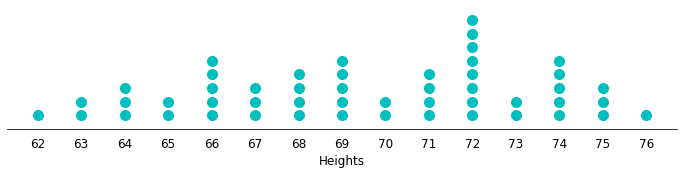

In [34]:
# Código  

import numpy as np
import matplotlib.pyplot as plt

# Datos proporcionados anteriormente
hs_heights = np.array([
    71, 67, 64, 72, 65, 69, 66, 68, 69, 72, 
    69, 73, 69, 72, 73, 74, 76, 68, 66, 63, 
    67, 71, 72, 74, 68, 69, 75, 71, 72, 72, 
    65, 66, 72, 74, 66, 62, 75, 75, 64, 63, 
    64, 66, 74, 67, 72, 70, 71, 70, 74, 68
])

 

# Obtener los valores únicos y sus frecuencias
values, counts = np.unique(hs_heights, return_counts=True)

# Dibujar el diagrama de puntos con tamaño de figura adecuado, tamaño de los marcadores y límites del eje y
fig, ax = plt.subplots(figsize=(12, 2.25))
for value, count in zip(values, counts):
    ax.plot([value] * count, list(range(count)), 'co', ms=10, linestyle='')

# Ajustes en las líneas y ejes
for spine in ['top', 'right', 'left']:
    ax.spines[spine].set_visible(False)
ax.yaxis.set_visible(False)
ax.set_ylim(-1, max(counts))
ax.set_xticks(np.arange(62, 76 + 0.2, 1))  # Marcas en el eje x entre 0 y el máximo
ax.tick_params(axis='x', length=0, pad=8, labelsize=12)
# Etiqueta en el eje X
ax.set_xlabel("Heights", fontsize=12)
plt.show()

### Diagrama de tallos y hojas.

El diagrama de tallo y hojas es una técnica estadística utilizada para visualizar la distribución de un conjunto de datos numéricos. En este diagrama, cada número se divide en dos componentes: el dígito principal forma el "tallo" y los dígitos restantes se convierten en las "hojas". El tallo se organiza de manera vertical a lo largo del eje y los valores de las hojas se alinean horizontalmente a lo largo del eje, permitiendo una comparación visual de la frecuencia de los valores en los datos.

En python la libreria `stemgraphic` permite realizar diagrama de tallos y hojasb

In [ ]:
#Para instalar el paquete stemgraphic utilizando pip, 
#import sys
#!{sys.executable} -m pip install stemgraphic

### Ejemplo:

Realice un diagrama de tallas y hojas para los siguientes datos: 


    96, 93, 88, 117, 127, 95, 113, 96, 108, 94, 148, 156, 139, 142, 94, 
107, 125, 155, 155, 103, 112, 127, 117, 120, 112, 135, 132, 111, 125, 104, 106, 
139, 134, 119, 97, 89, 118, 136, 125, 143, 120, 103, 113, 124, 138
    

(<Figure size 540x198 with 1 Axes>, <Axes:>)

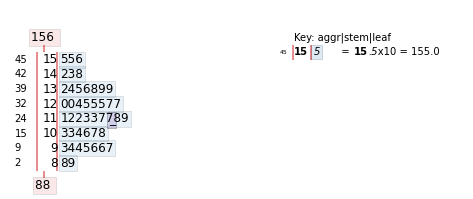

In [39]:
#Solución:

datos = [96, 93, 88, 117, 127, 95, 113, 96, 108, 94, 148, 156, 139, 142, 94, 
107, 125, 155, 155, 103, 112, 127, 117, 120, 112, 135, 132, 111, 125, 104, 106, 
139, 134, 119, 97, 89, 118, 136, 125, 143, 120, 103, 113, 124, 138]

stemgraphic.stem_graphic(datos, scale = 10)



### Ejemplo:

Realice un diagrama de tallas y hojas para los siguientes datos: 

(<Figure size 540x144 with 1 Axes>, <Axes:>)

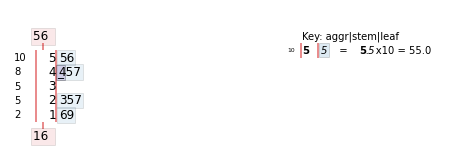

In [41]:
# importing the module
  
data = [16, 25, 47, 56, 23, 45, 19, 55, 44, 27]
  
# calling stem_graphic with required parameters,
# data and scale
stemgraphic.stem_graphic(data, scale = 10)

###  Ejemplo: 

Supongamos que tenemos una muestra sobre el ritmo cardíaco de 24 hombres,
las observaciones son las siguientes:

ritmo = [88, 80, 76, 72, 68, 56, 64, 60, 64, 68, 64, 68, 
         72, 76, 80, 84, 68, 80, 76, 72, 84, 80, 72, 76 ]
         
- Graficar el histograma de estas observaciones ( tomar bins = 8)
- Realizar un diagrama de tallos y hojas
- Realizar un diagrama de puntos

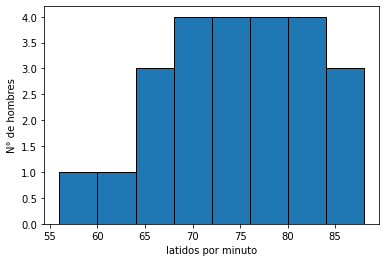

In [42]:
#Histograma
ritmo = [88, 80, 76, 72, 68, 56, 64, 60, 64, 68, 64, 68, 
         72, 76, 80, 84, 68, 80, 76, 72, 84, 80, 72, 76 ]

plt.hist(ritmo, bins=8, edgecolor='black')
plt.xlabel("latidos por minuto")
plt.ylabel("N° de hombres")
plt.show()

(<Figure size 540x126 with 1 Axes>, <Axes:>)

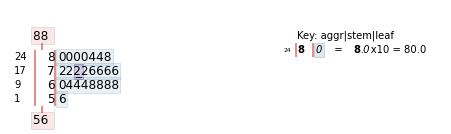

In [43]:
#diagrama de tallos y hojas

stemgraphic.stem_graphic(ritmo, scale = 10)